In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Project Cycle
1. Data Ingestion
2. EDA
3. Preprocessing
4. Model Bulding
5. Model Evalution

## Data Ingestion
1. Import required Libraries: pandas, numpy, seaborn, matplotlib.pyplot, sklearn
2. Load the data
3. Load the Time Series into a pandas DataFrame
4. Set the datetime column as index of the DataFrame
5. Check the datatype of the index and convert into datetime if necessary

In [2]:
df = pd.read_csv("TSLA.csv")

In [3]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          758 non-null    object 
 1   Open          758 non-null    float64
 2   High          758 non-null    float64
 3   Low           758 non-null    float64
 4   Close         758 non-null    float64
 5   Volume        758 non-null    int64  
 6   Dividends     758 non-null    int64  
 7   Stock Splits  758 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 47.5+ KB


## Types of variante time series
1. univariante time series
2. multivariate time series

In [5]:
## univariate time analysis
close_date_price = df[["Date","Close"]]

In [6]:
close_date_price

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [7]:
close_date_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [8]:
## object type of data will convert into the datatime type
import warnings
warnings.filterwarnings("ignore")
close_date_price.Date = pd.to_datetime(close_date_price.Date)

In [9]:
close_date_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [10]:
close_date_price.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [11]:
close_date_price.set_index("Date",inplace=True)

In [12]:
close_date_price
 

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


### Why we are convertinthe column as a index column
1. can easily retrive the data using date value
2. Visualization is also simple
3. Those lib has been degine in such a way it required data as a index(scipy statsmodel)

## EDA(Exploratory Data Analysis)

In [13]:
close_date_price.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


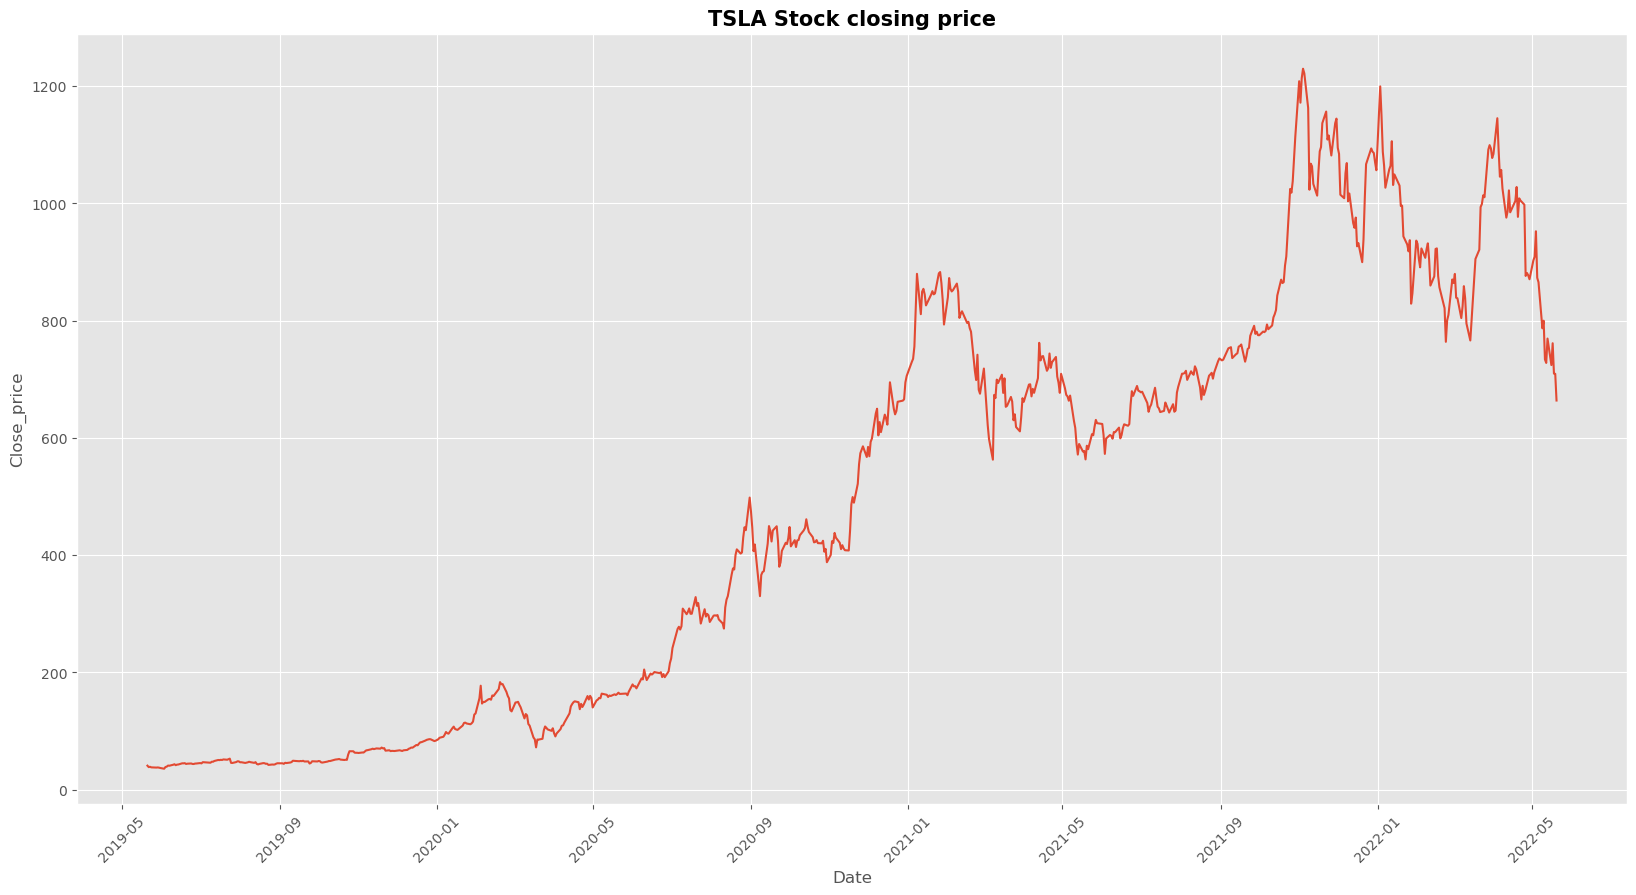

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title("TSLA Stock closing price",fontsize=15,fontweight="bold",loc="Center")
plt.plot(close_date_price.Close)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.grid(True)
plt.ylabel("Close_price")
plt.show()

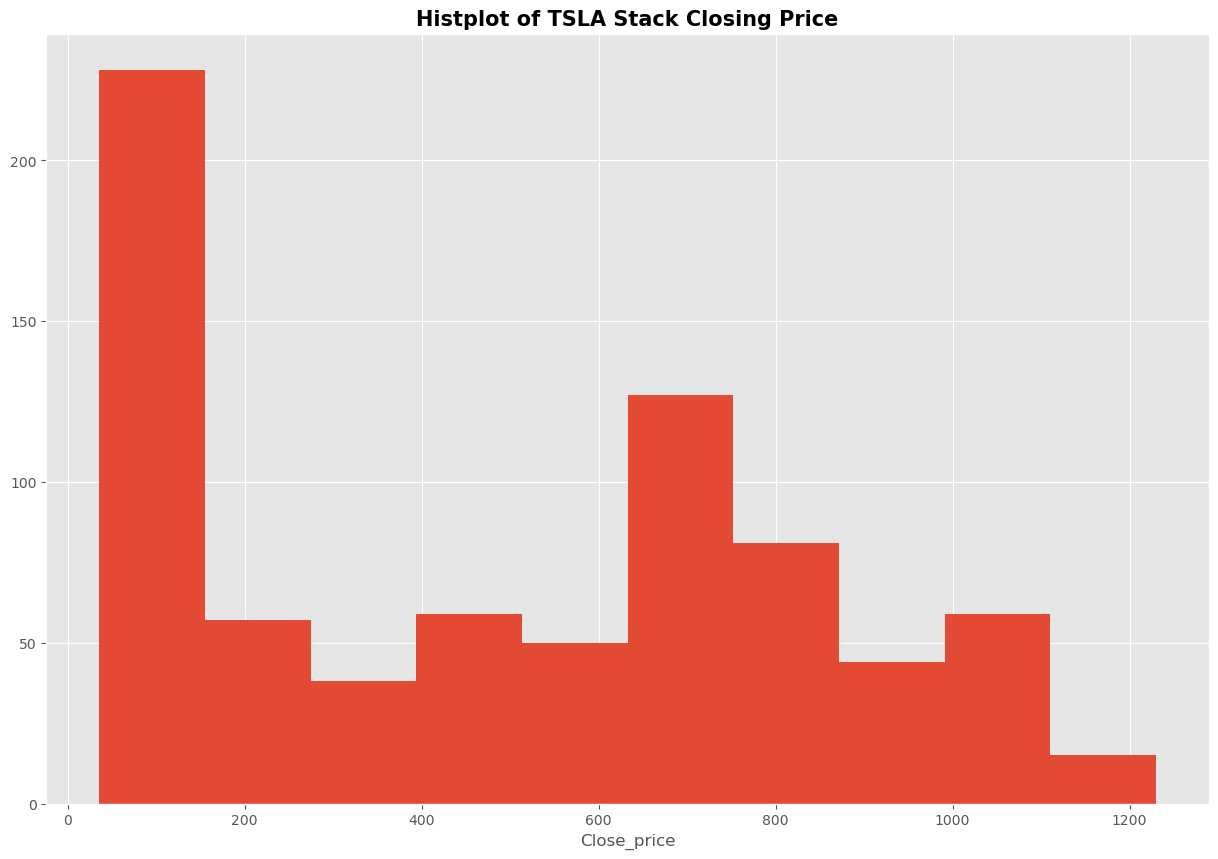

In [15]:
plt.figure(figsize=(15,10))
plt.title("Histplot of TSLA Stack Closing Price",fontsize=15,fontweight="bold",loc="Center")
plt.hist(close_date_price.Close)
plt.xlabel("Close_price")
plt.show()

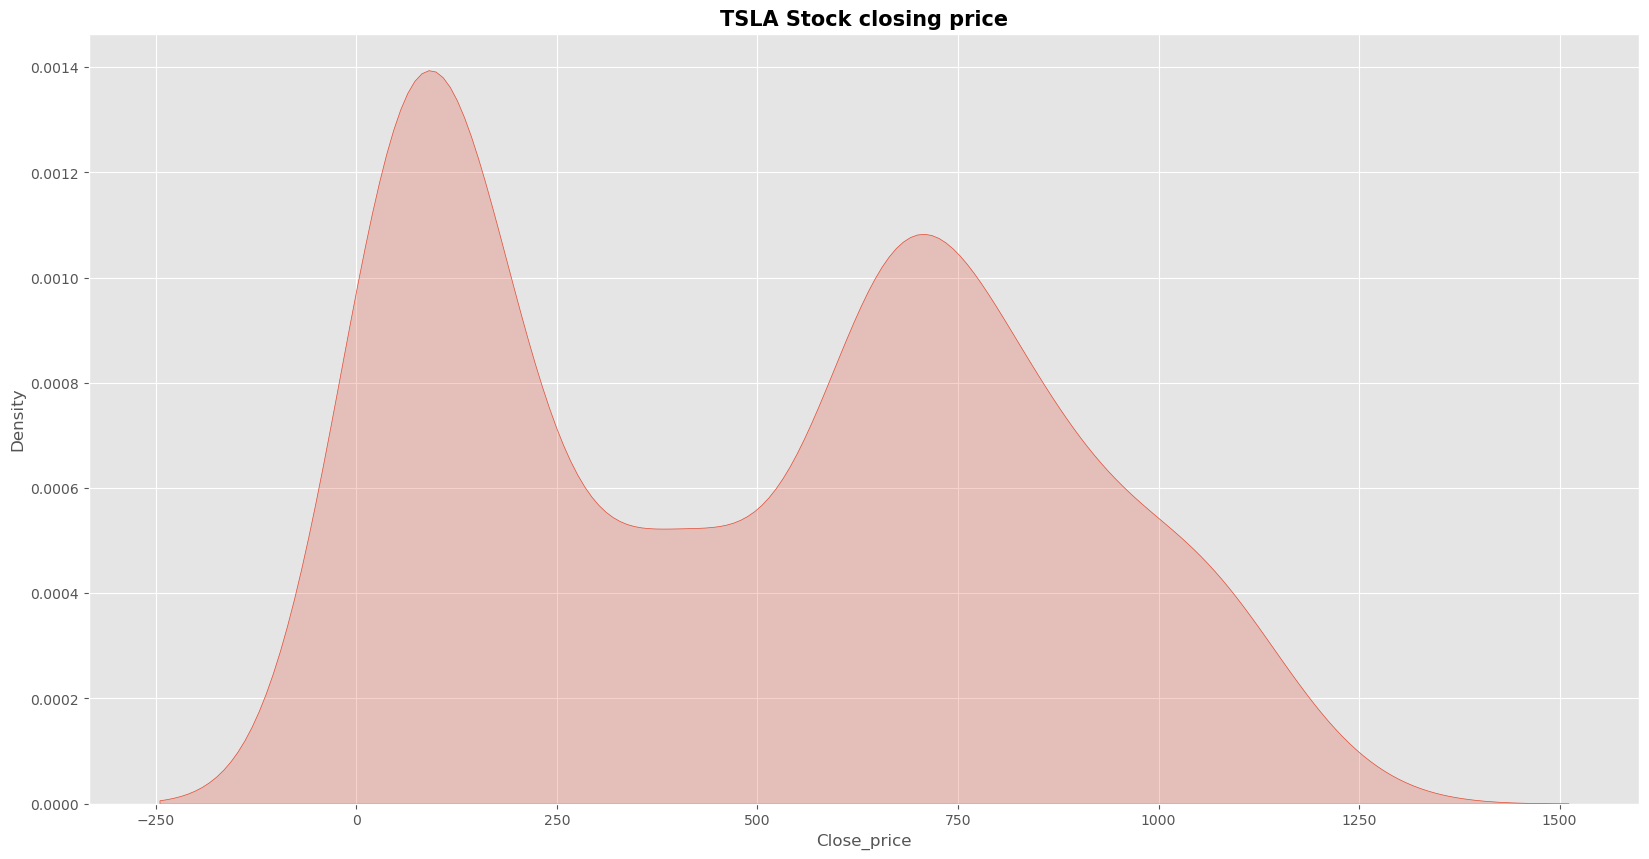

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title("TSLA Stock closing price",fontsize=15,fontweight="bold",loc="Center")
sns.kdeplot(close_date_price.Close,shade=True)
plt.grid(True)
plt.xlabel("Close_price")
plt.show()

In [18]:
close_date_price.Close.rolling(3) 

Rolling [window=3,center=False,axis=0,method=single]

In [19]:
roll_mean = close_date_price.Close.rolling(3) .mean()

In [20]:
roll_std = close_date_price.Close.rolling(3).std()

In [21]:
roll_mean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23     39.553333
2019-05-24     38.590000
2019-05-28     38.321334
                 ...    
2022-05-16    740.653341
2022-05-17    751.856669
2022-05-18    731.929993
2022-05-19    726.946655
2022-05-20    694.376668
Name: Close, Length: 758, dtype: float64

In [22]:
roll_std

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23     1.296425
2019-05-24     0.487492
2019-05-28     0.699754
                ...    
2022-05-16    25.125547
2022-05-17    24.136242
2022-05-18    26.714694
2022-05-19    30.019958
2022-05-20    26.394268
Name: Close, Length: 758, dtype: float64

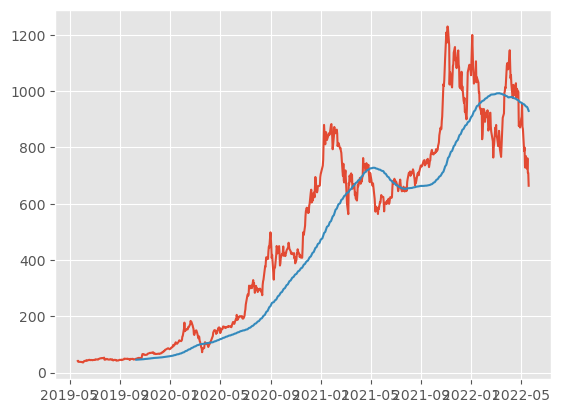

In [23]:
### Smothing the data
roll_mean = close_date_price.Close.rolling(100).mean()
plt.plot(close_date_price)
plt.plot(roll_mean)

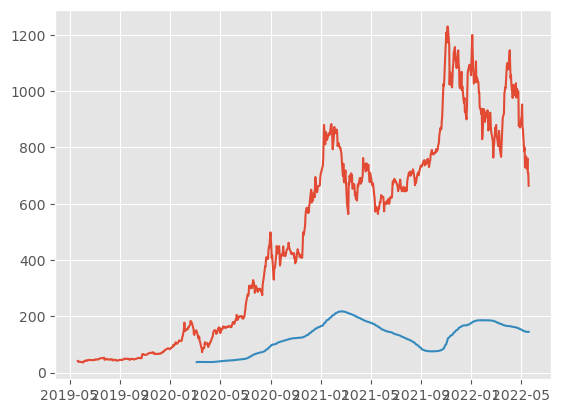

In [24]:
roll_mean = close_date_price.Close.rolling(200).std()
plt.plot(close_date_price)
plt.plot(roll_mean)

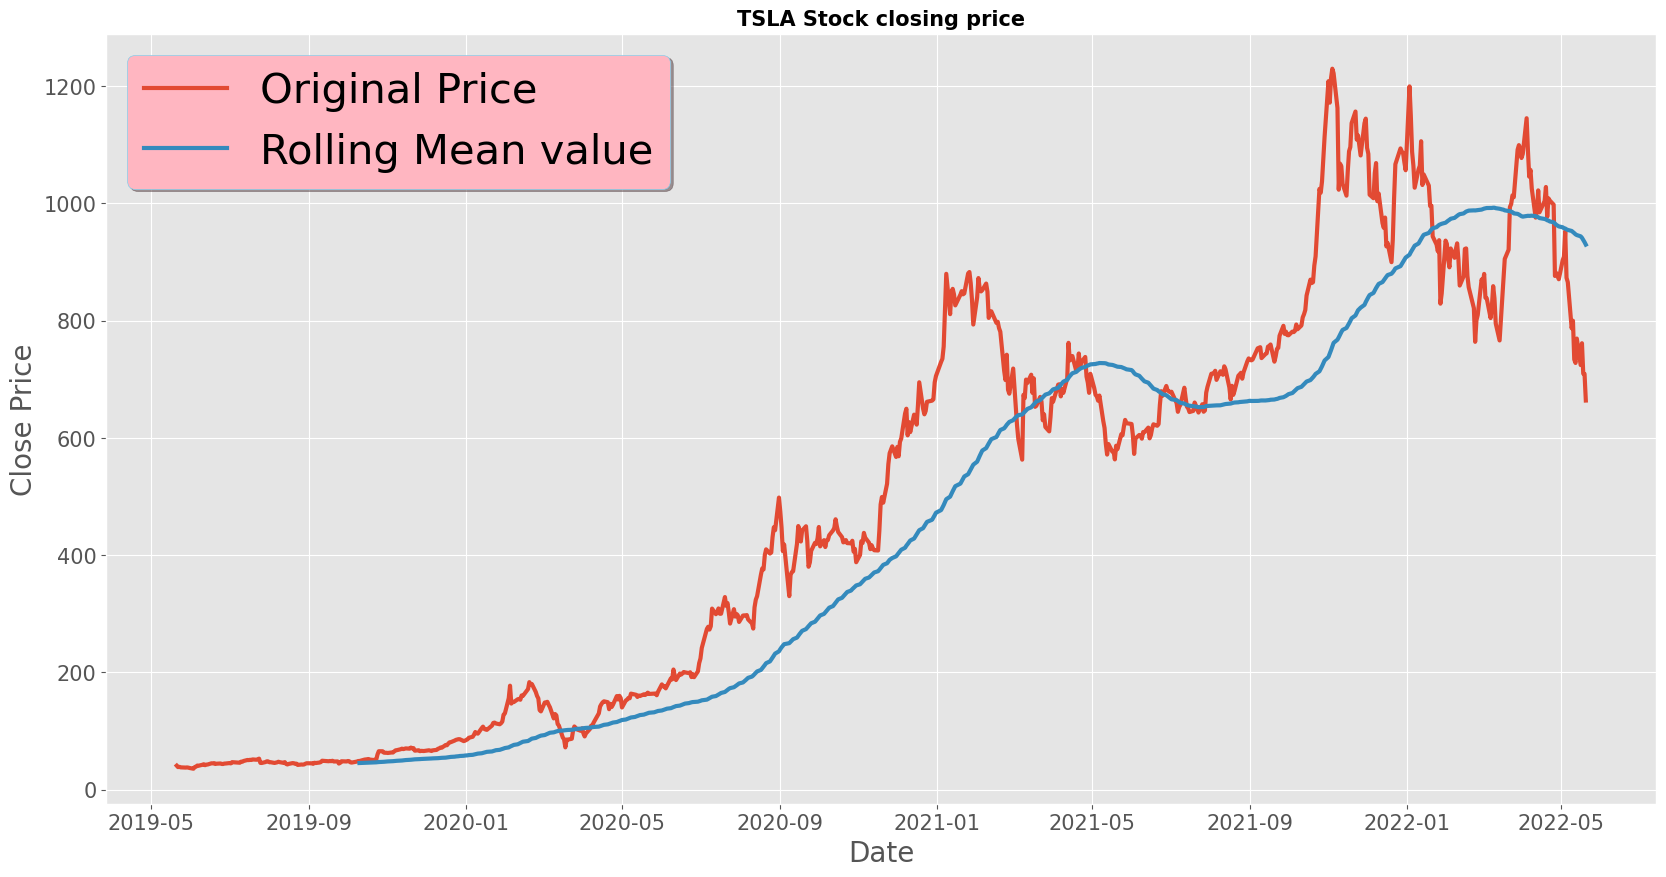

In [25]:
roll_mean = close_date_price.Close.rolling(100).mean()
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title("TSLA Stock closing price",fontsize=15,fontweight="bold",loc="Center")
plt.plot(close_date_price.Close,linewidth=3,label="Original Price")
# plt.plot(timeseries,color='blue',label='Original',linewidth=3)
plt.plot(roll_mean,linewidth=3,label="Rolling Mean value")
plt.legend(loc="best",fontsize=30,shadow=True,facecolor="lightpink",edgecolor='skyblue')

plt.xticks(fontsize=15)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Close Price",fontsize=20)
plt.yticks(fontsize=15)
plt.grid("both")
plt.show(block=False)

In [26]:
## check the Stationary or Non stationary
from statsmodels.tsa.stattools import adfuller
adfu =adfuller(close_date_price.Close)

In [27]:
adfu

(-1.363008581703749,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [28]:
pd.Series(adfu[:4],index=["Test_Stats","P_value","lag","Data_points"])

Test_Stats      -1.363009
P_value          0.599876
lag              9.000000
Data_points    748.000000
dtype: float64

In [29]:
### For Stationary
def test_stationarity(timeseries):
    ## Determing the rolling Statistics
    roll_mean = timeseries.rolling(48).mean() ## rolling mean
    roll_std = timeseries.rolling(48).std() ## rolling standard deviation
    ## Plot the rolling Statistics
     
    plt.style.use('ggplot')
    plt.figure(figsize=(20,10))
    plt.title("TSLA Stock closing price",fontsize=25,fontweight="bold",loc="Center")
    plt.plot(timeseries,color='red',label='Original',linewidth=1)
    plt.plot(roll_mean,color='green',label='Rolling Mean',linewidth=3)
    plt.plot(roll_std,color='blue',label='Rolling Std',linewidth=3)
    plt.legend(loc="best",fontsize=30,shadow=True,facecolor="lightpink",edgecolor='k')
    plt.xticks(fontsize=15)
    plt.xlabel("Date",fontsize=20)
    plt.ylabel("Close Price",fontsize=20)
    plt.yticks(fontsize=15)
    plt.grid("both")
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adfu = adfuller(timeseries,autolag='AIC')
    ## Output for dft will give us without defining what the values are.
    ## Hance we manuvally write what values does it explains using a for loop
    output = pd.Series(adfu[:4],index=["Test_Statistics","P_value","Number_of_lags","Number_of_Data_points"])
    for key,value in adfu[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)
    
    

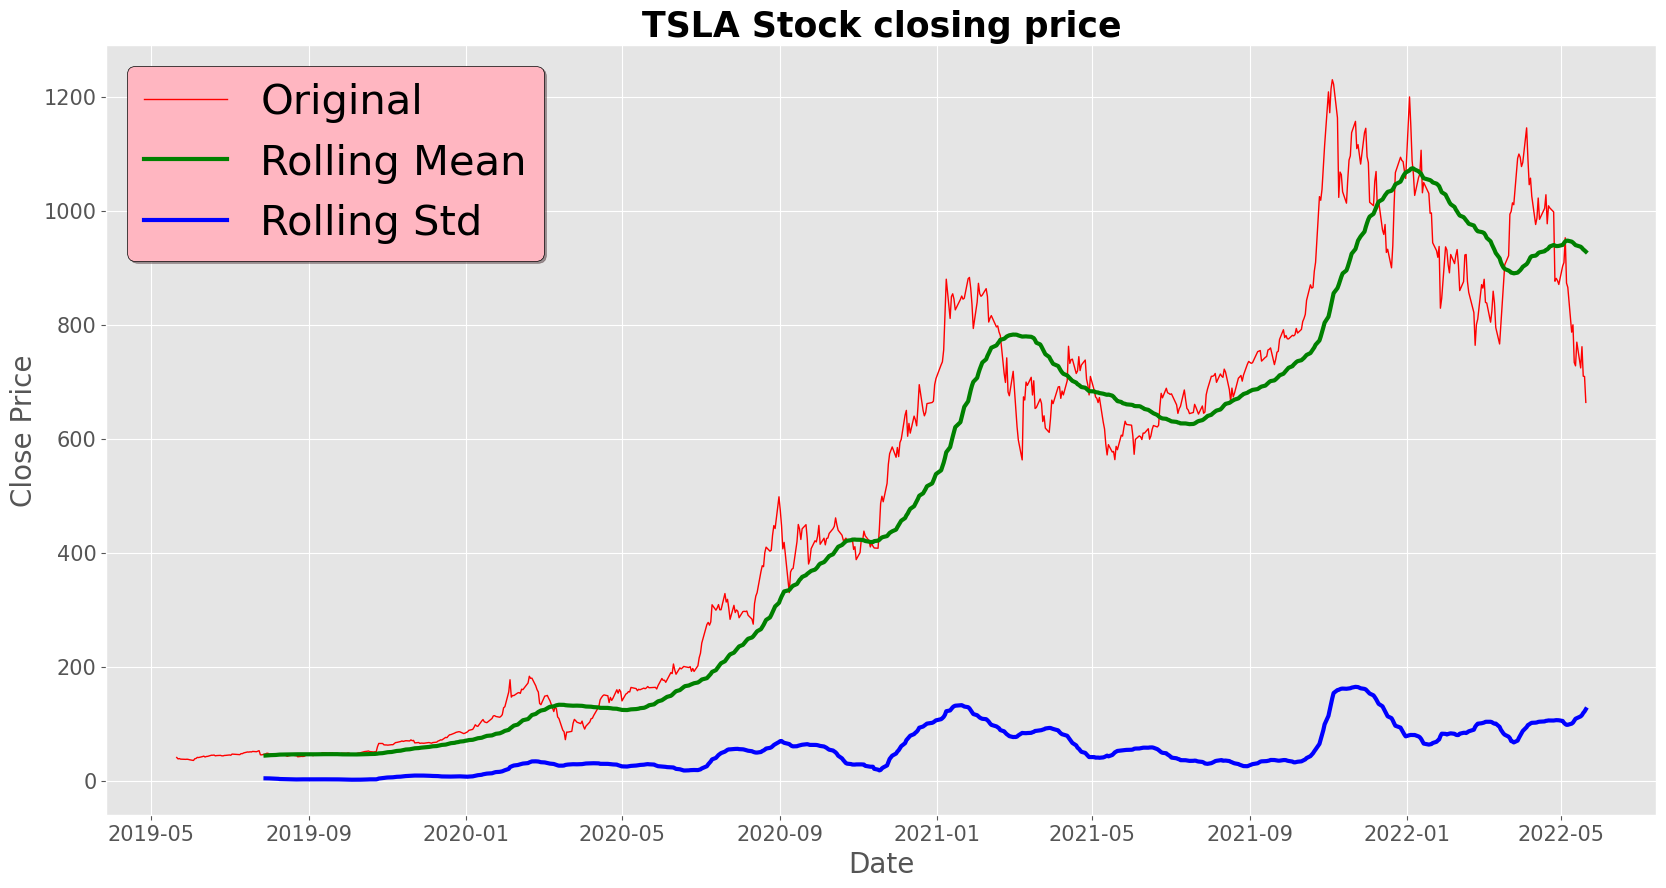

Results of dickey fuller test
Test_Statistics           -1.363009
P_value                    0.599876
Number_of_lags             9.000000
Number_of_Data_points    748.000000
Critical Value (1%)       -3.439123
Critical Value (5%)       -2.865412
Critical Value (10%)      -2.568832
dtype: float64


In [30]:
test_stationarity(close_date_price)

## ACF Parameters
1. Trend
2. Seasonal
3. Noise
4. Stationary

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
output = seasonal_decompose(close_date_price,period=20)

In [32]:
output

<Figure size 2000x1000 with 0 Axes>

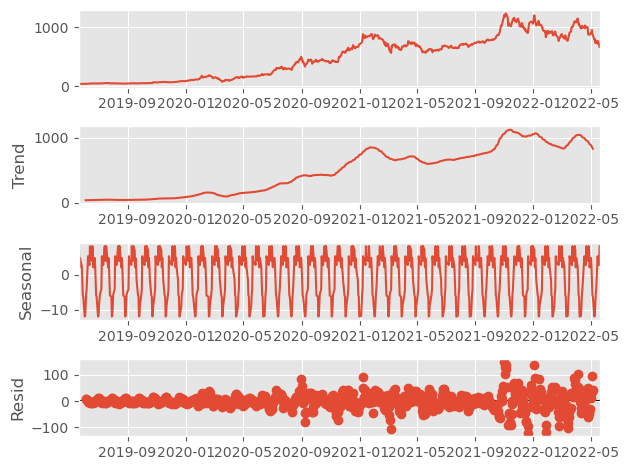

In [33]:
plt.figure(figsize=(20,10))
fig = output.plot()
 

<Figure size 2000x1000 with 0 Axes>

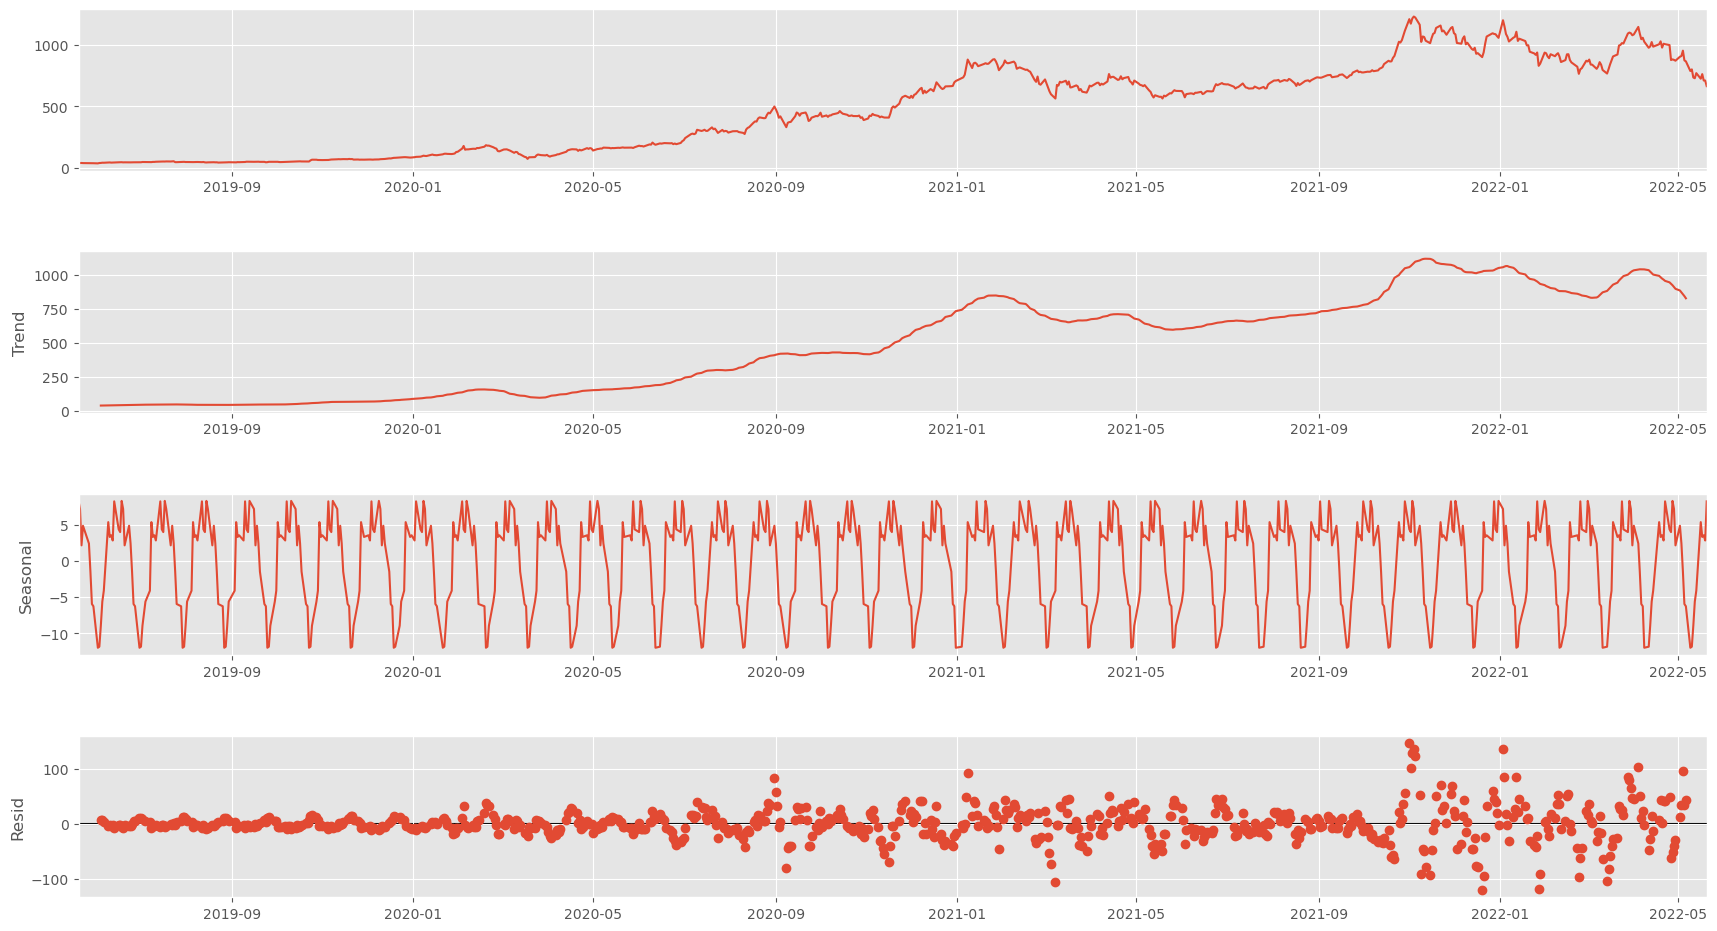

In [34]:
plt.figure(figsize=(20,10))
fig = output.plot()
fig.set_size_inches(20,10)

<Figure size 2000x1000 with 0 Axes>

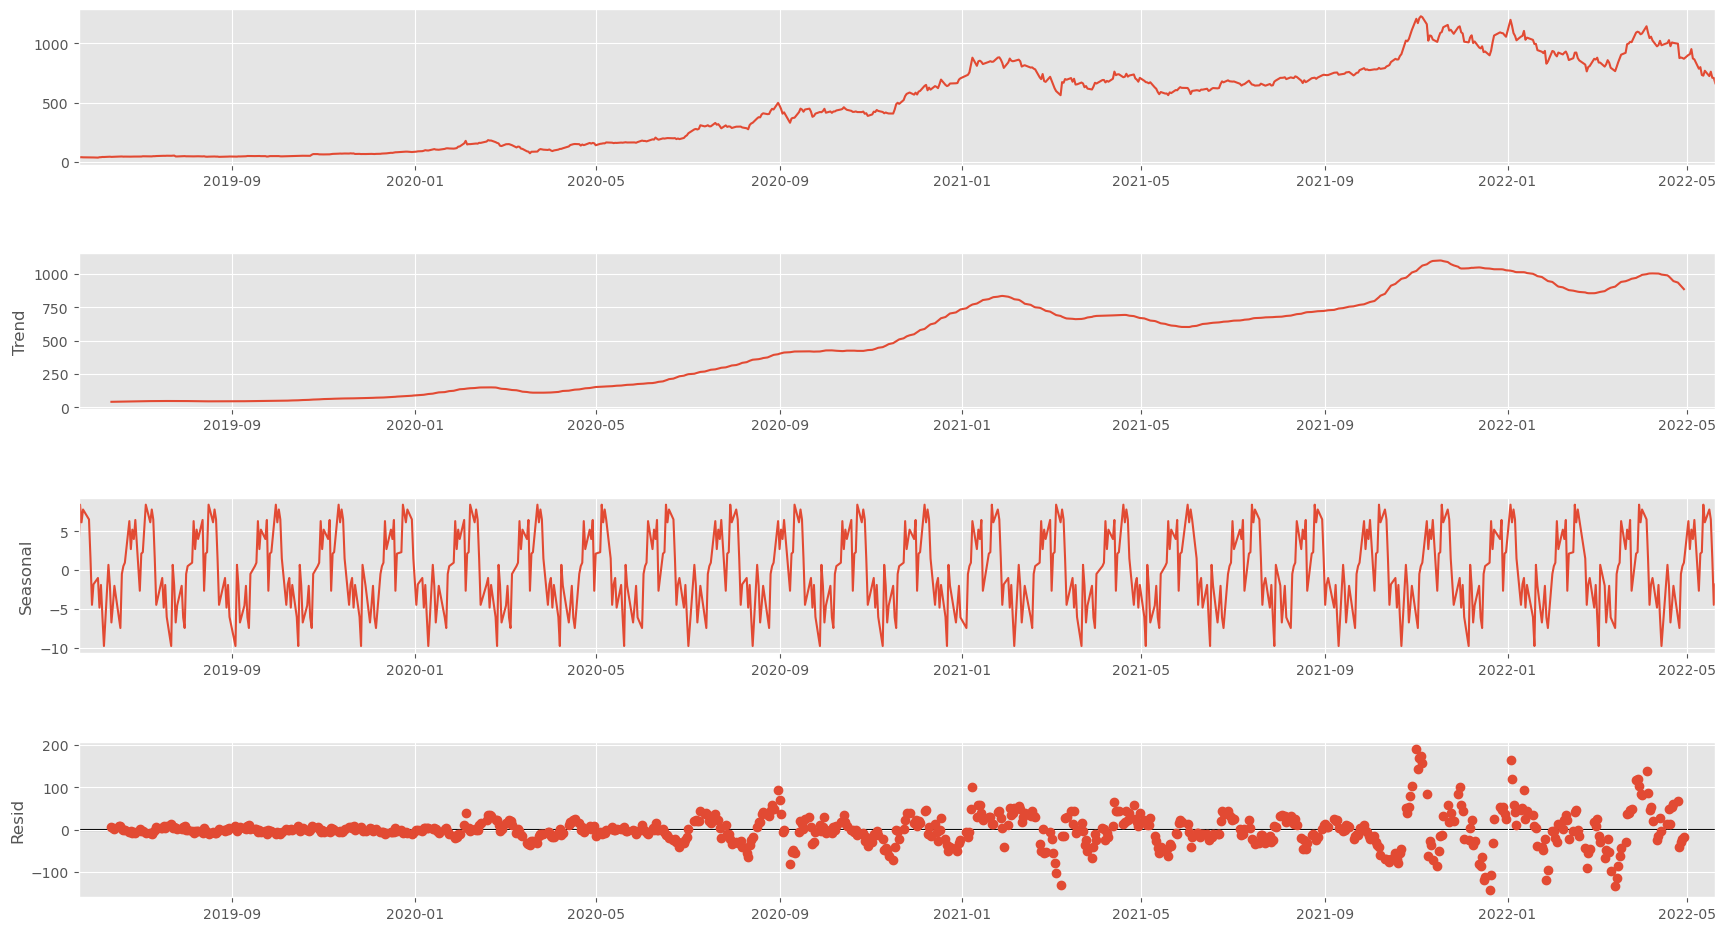

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
output1 = seasonal_decompose(close_date_price,period=30,)
plt.figure(figsize=(20,10))
fig = output1.plot()
fig.set_size_inches(20,10)

In [36]:
output.resid

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: resid, Length: 758, dtype: float64

In [37]:
output.seasonal

Date
2019-05-21    8.249963
2019-05-22    7.133984
2019-05-23    2.130752
2019-05-24    4.828640
2019-05-28    2.384057
                ...   
2022-05-16    5.329148
2022-05-17    3.287633
2022-05-18    3.516500
2022-05-19    2.802741
2022-05-20    8.188838
Name: seasonal, Length: 758, dtype: float64

In [38]:
output.trend

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: trend, Length: 758, dtype: float64

In [39]:
output.trend.unique()

array([          nan,   40.43995047,   40.68115044,   40.94745045,
         41.24435053,   41.56470051,   41.86705046,   42.18720045,
         42.55180044,   42.98430042,   43.38005037,   43.72635031,
         44.05365028,   44.31860027,   44.53370028,   44.72870035,
         44.98450041,   45.28705034,   45.63580027,   45.96545029,
         46.25280027,   46.53895025,   46.86730032,   47.22920036,
         47.58095036,   47.9892004 ,   48.26255045,   48.33630047,
         48.42385044,   48.56085043,   48.72160044,   48.80165043,
         48.80260048,   48.79870052,   48.79205055,   48.76800051,
         48.73900042,   48.68715038,   48.51435032,   48.30500021,
         48.04190016,   47.6762001 ,   47.29549999,   46.96004992,
         46.64424992,   46.25244989,   45.99884987,   45.8822998 ,
         45.69524975,   45.45049982,   45.17949991,   44.98869991,
         44.88434992,   44.82414989,   44.75724983,   44.68769989,
         44.61424999,   44.54390011,   44.56045027,   44.65360

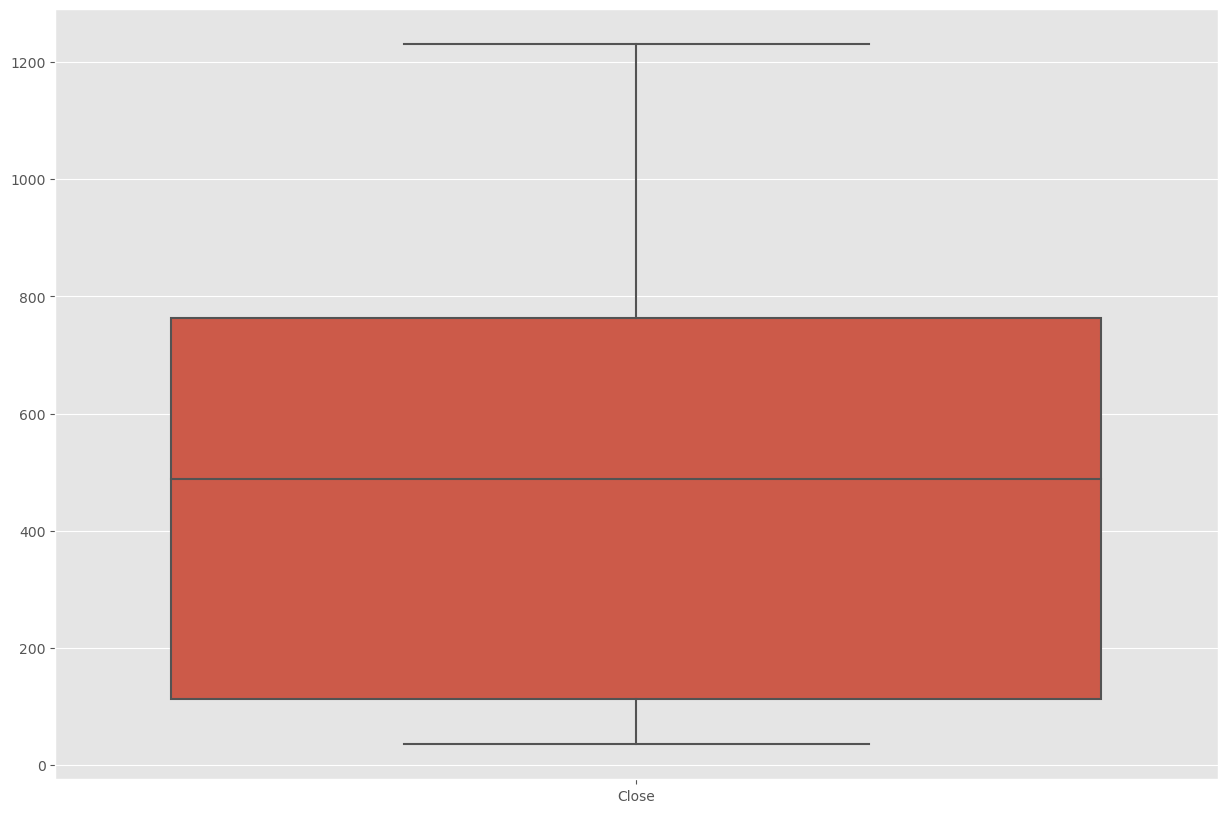

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(close_date_price)
plt.show()

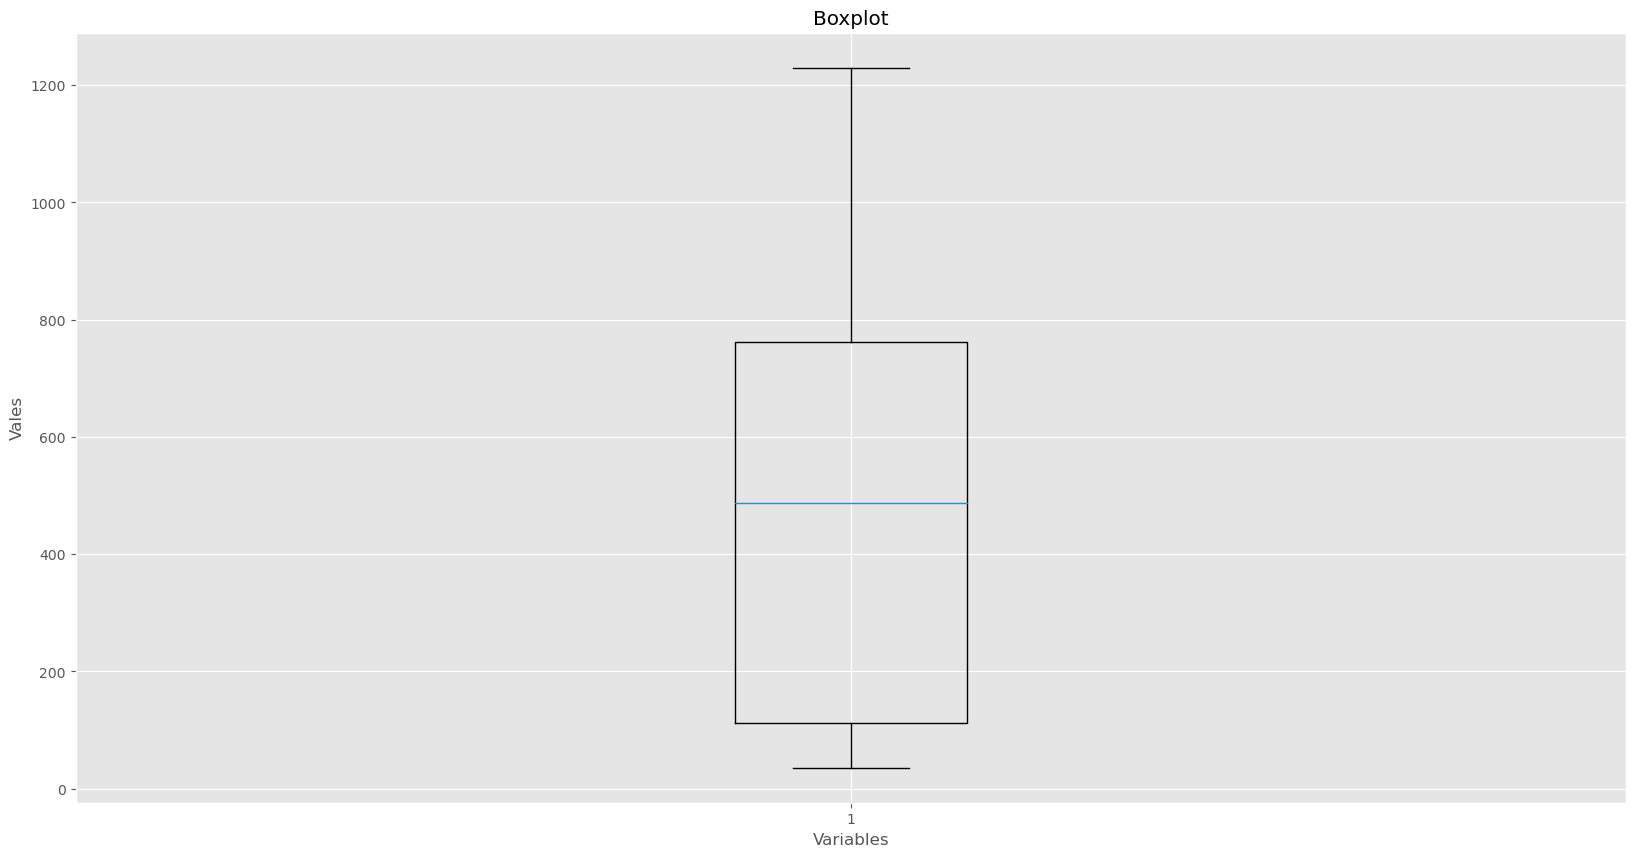

In [41]:
fig,ax = plt.subplots(figsize=(20,10))
ax.boxplot(close_date_price)
ax.set_xlabel('Variables')
ax.set_ylabel('Vales')
ax.set_title("Boxplot")
plt.show()

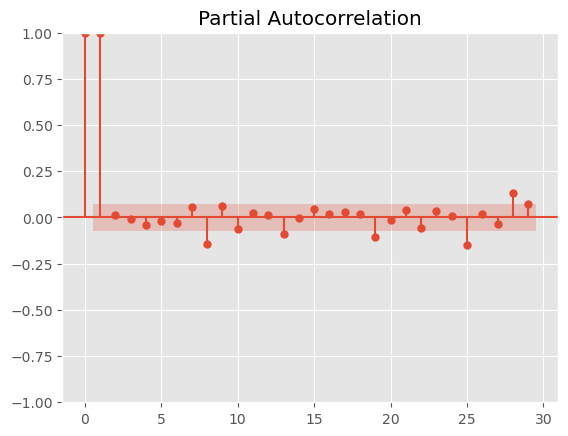

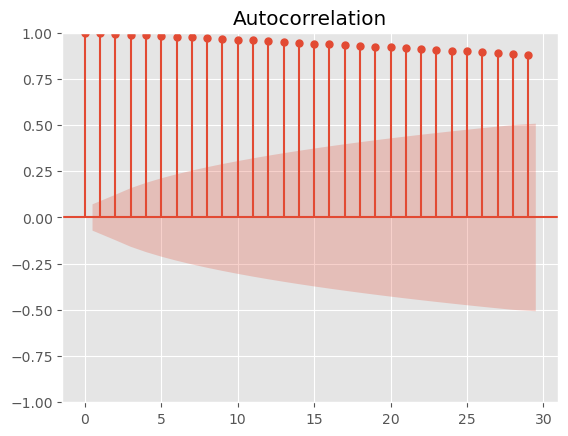

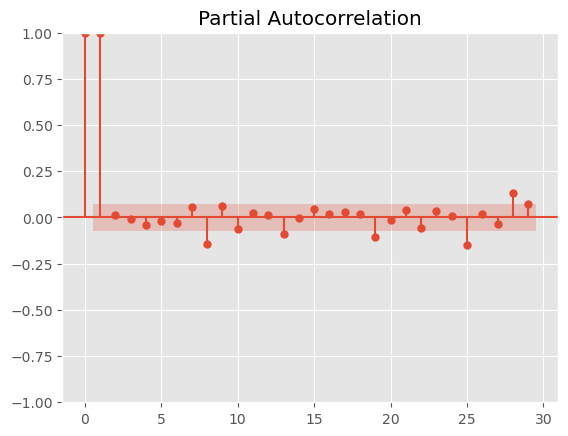

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(close_date_price.Close)
plot_pacf(close_date_price.Close)

## Processing
1. Fill the missing values(here not required)
2. Convert data into the stationary time series
3. If necessary then normalise the data (here not required)
4. split the data into train and test data sets
5. Clean the data by removing the outliers(herenot required)

In [43]:
df_close = close_date_price

In [44]:
df_close

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [45]:
close_diff_1 = df_close.diff()
close_diff_1 = close_diff_1.dropna()

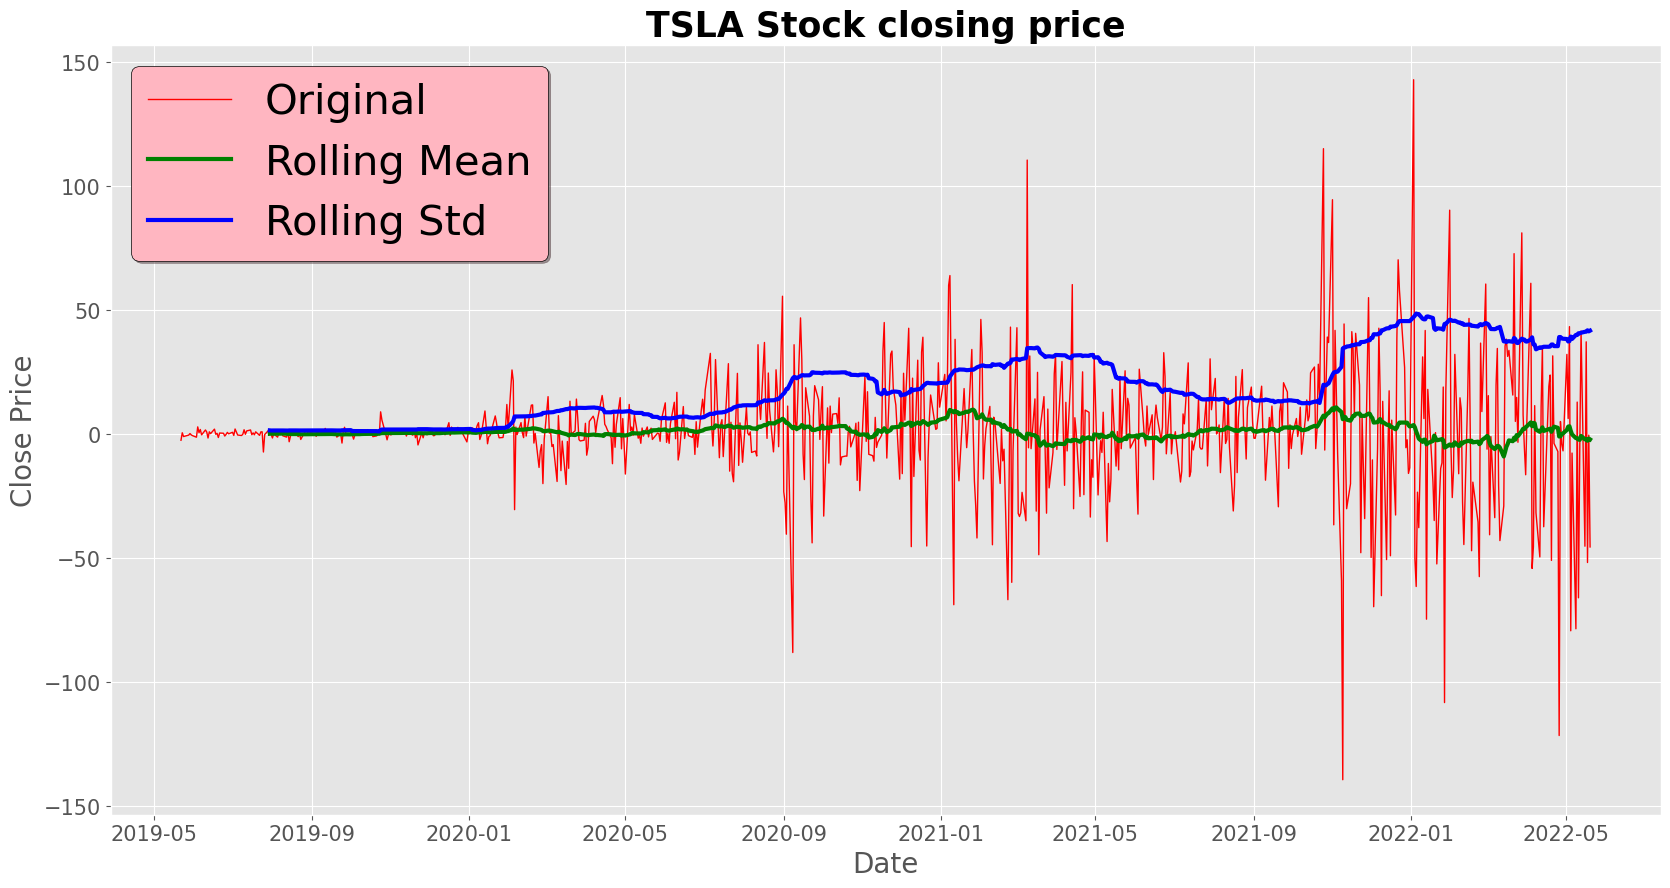

Results of dickey fuller test
Test_Statistics         -8.324564e+00
P_value                  3.498786e-13
Number_of_lags           8.000000e+00
Number_of_Data_points    7.480000e+02
Critical Value (1%)     -3.439123e+00
Critical Value (5%)     -2.865412e+00
Critical Value (10%)    -2.568832e+00
dtype: float64


In [46]:
test_stationarity(close_diff_1)

In [47]:
close_diff_2 = df_close.diff(2)
close_diff_2 = close_diff_2.dropna()

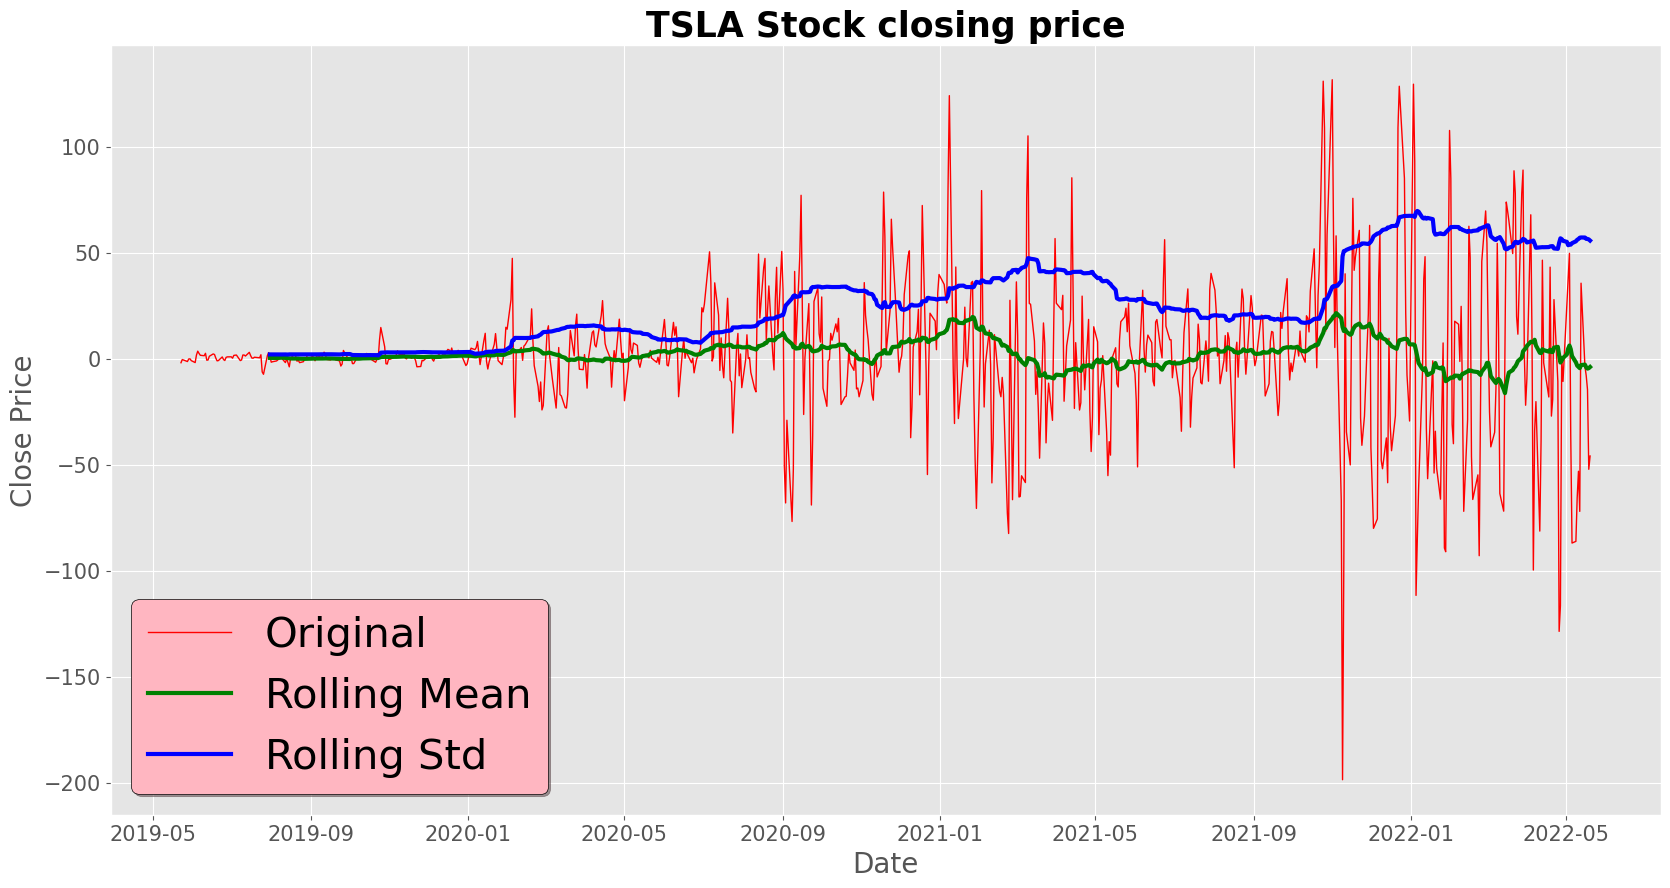

Results of dickey fuller test
Test_Statistics         -6.027267e+00
P_value                  1.445919e-07
Number_of_lags           1.700000e+01
Number_of_Data_points    7.380000e+02
Critical Value (1%)     -3.439242e+00
Critical Value (5%)     -2.865464e+00
Critical Value (10%)    -2.568860e+00
dtype: float64


In [48]:
test_stationarity(close_diff_2)

In [49]:
close_diff_3 = df_close.diff(3)
close_diff_3 = close_diff_3.dropna()

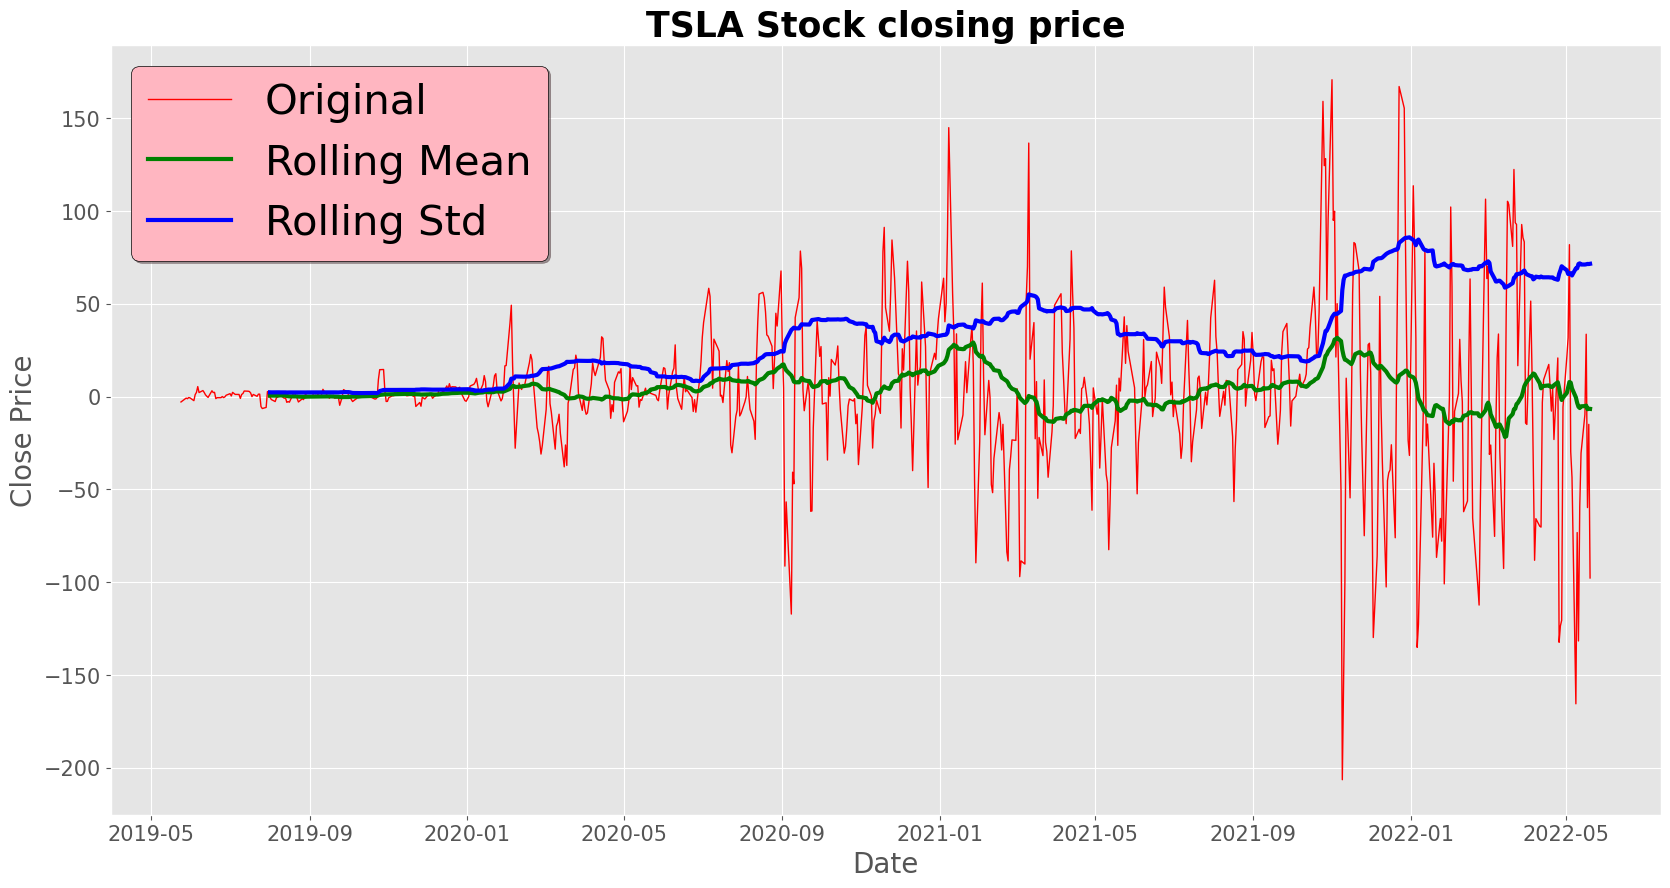

Results of dickey fuller test
Test_Statistics         -5.697365e+00
P_value                  7.817959e-07
Number_of_lags           1.900000e+01
Number_of_Data_points    7.350000e+02
Critical Value (1%)     -3.439278e+00
Critical Value (5%)     -2.865480e+00
Critical Value (10%)    -2.568868e+00
dtype: float64


In [50]:
test_stationarity(close_diff_3)

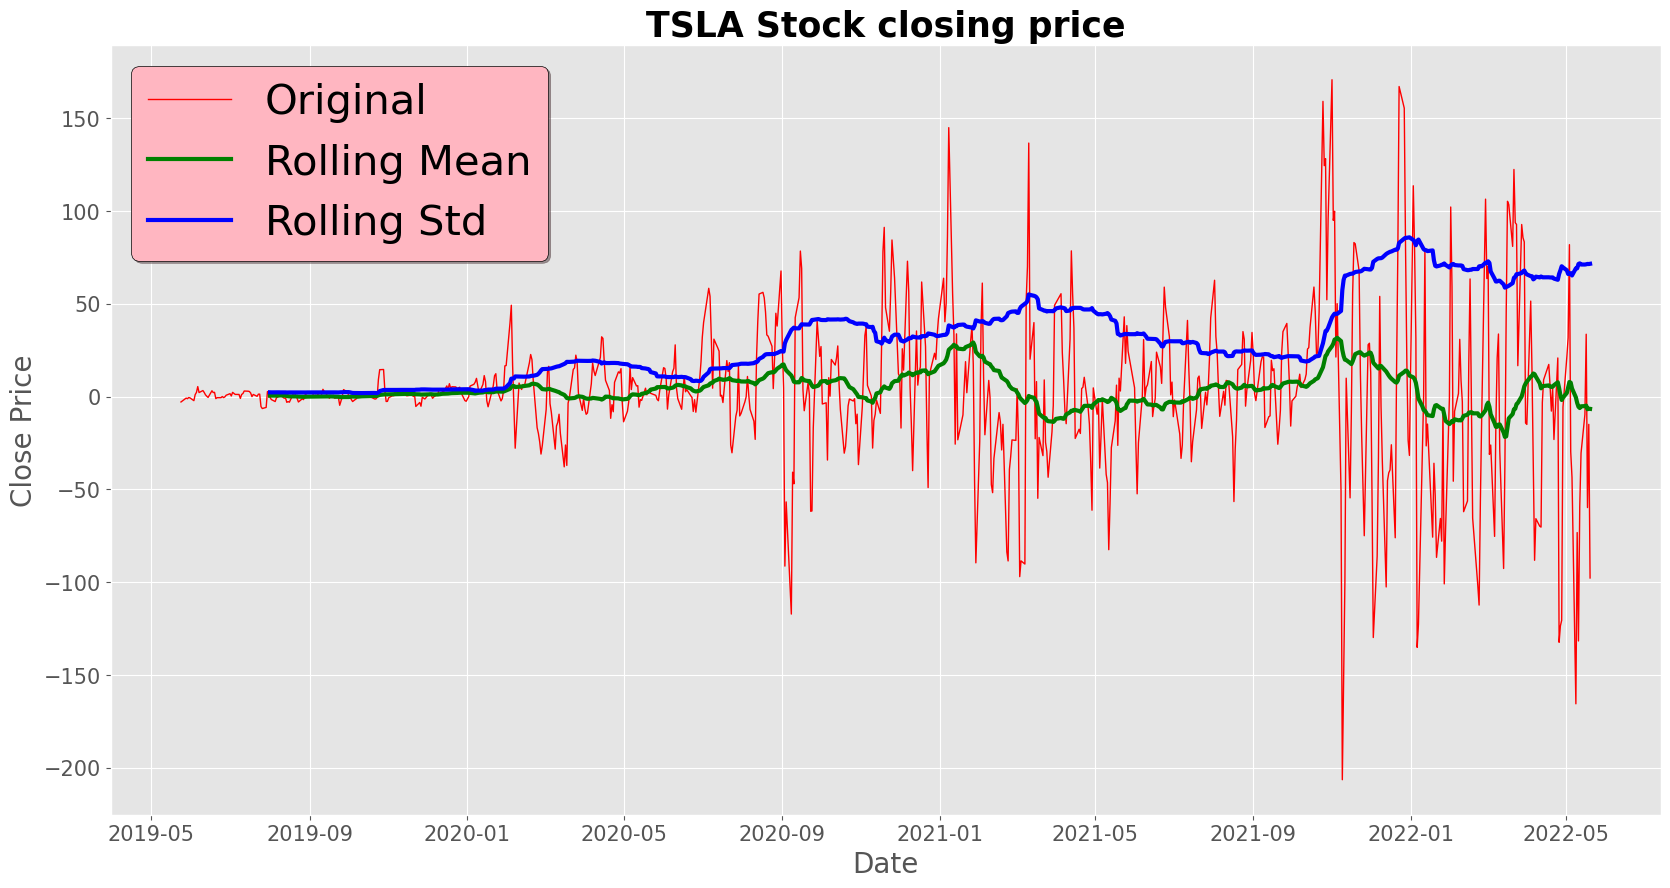

Results of dickey fuller test
Test_Statistics         -5.697365e+00
P_value                  7.817959e-07
Number_of_lags           1.900000e+01
Number_of_Data_points    7.350000e+02
Critical Value (1%)     -3.439278e+00
Critical Value (5%)     -2.865480e+00
Critical Value (10%)    -2.568868e+00
dtype: float64


In [51]:
close_diff_50 = df_close.diff(50)
close_diff_50 = close_diff_3.dropna()
test_stationarity(close_diff_50)

In [52]:
train_data = df_close[:-80]
test_data = df_close[-80:]


In [53]:
train_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-01-20,996.270020
2022-01-21,943.900024
2022-01-24,930.000000


In [54]:
test_data

,Close
Date,
2022-01-27,829.099976
2022-01-28,846.349976
2022-01-31,936.719971
2022-02-01,931.250000
2022-02-02,905.659973
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [95]:
test_data.Close[0]

829.0999755859375

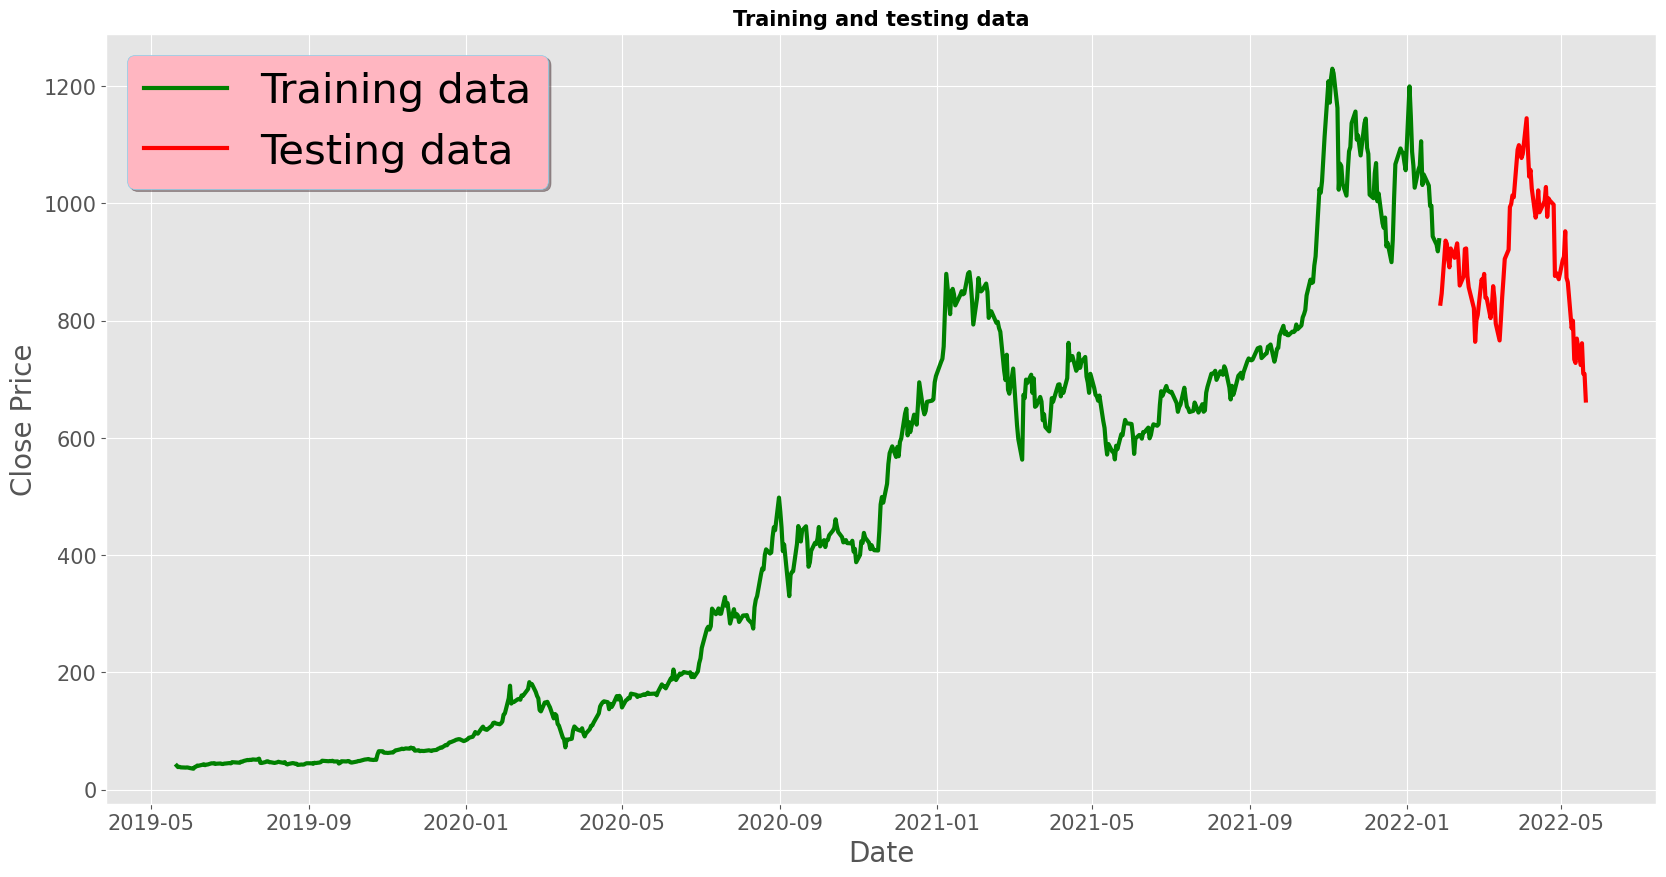

In [55]:
plt.figure(figsize=(20,10))
plt.title("Training and testing data",fontsize=15,fontweight="bold",loc="Center")

 
plt.plot(train_data,linewidth=3,label="Training data",color='green')
plt.plot(test_data,linewidth=3,label="Testing data",color='red')
plt.legend(loc="best",fontsize=30,shadow=True,facecolor="lightpink",edgecolor='skyblue')

plt.xticks(fontsize=15)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Close Price",fontsize=20)
plt.yticks(fontsize=15)
plt.grid("both")
plt.show(block=False)

## Model Building

In [62]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [63]:
history = [x for x in train_data.Close]

In [64]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [69]:
import warnings
warnings.filterwarnings("ignore")
model = ARIMA(history,order=(1,1,1))

In [70]:
model = model.fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  678
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3032.137
Date:                Fri, 27 Oct 2023   AIC                           6070.274
Time:                        18:10:51   BIC                           6083.827
Sample:                             0   HQIC                          6075.521
                                - 678                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0992      0.874     -0.113      0.910      -1.812       1.614
ma.L1          0.0713      0.872      0.082      0.935      -1.637       1.780
sigma2       454.7280     10.534     43.169      0.000     434.082     475.374
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2444.91
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              30.46   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
model.forecast()[0]

936.8581861659756

In [101]:
test_data.Close[0]

829.0999755859375

In [102]:
mean_squared_error([test_data.Close[0]],[model.forecast()[0]])

11611.831947411825

In [85]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [86]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [104]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data.Close, test_data.Close, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=453.530
ARIMA(0, 0, 1) RMSE=237.443
ARIMA(0, 0, 2) RMSE=167.228
ARIMA(0, 1, 0) RMSE=40.320
ARIMA(0, 1, 1) RMSE=40.297
ARIMA(0, 1, 2) RMSE=40.407
ARIMA(0, 2, 0) RMSE=58.551
ARIMA(0, 2, 1) RMSE=40.454
ARIMA(0, 2, 2) RMSE=40.436
ARIMA(1, 0, 0) RMSE=40.260
ARIMA(1, 0, 1) RMSE=40.246
ARIMA(1, 0, 2) RMSE=40.360
ARIMA(1, 1, 0) RMSE=40.296
ARIMA(1, 1, 1) RMSE=40.379
ARIMA(1, 1, 2) RMSE=40.702
ARIMA(1, 2, 0) RMSE=49.803
ARIMA(1, 2, 1) RMSE=40.435
ARIMA(1, 2, 2) RMSE=40.474
ARIMA(2, 0, 0) RMSE=40.243
ARIMA(2, 0, 1) RMSE=40.235
ARIMA(2, 0, 2) RMSE=40.421
ARIMA(2, 1, 0) RMSE=40.408
ARIMA(2, 1, 1) RMSE=40.529
ARIMA(2, 1, 2) RMSE=40.579
ARIMA(2, 2, 0) RMSE=47.425
ARIMA(2, 2, 1) RMSE=40.545
ARIMA(2, 2, 2) RMSE=40.562
Best ARIMA(2, 0, 1) RMSE=40.235


In [105]:
train_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-01-20,996.270020
2022-01-21,943.900024
2022-01-24,930.000000


In [111]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
for p in p_values:
        for d in d_values:
            for q in q_values:
                print(p,d,q)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [116]:
history=[x for x in train_data.Close]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=ARIMA(history,order=(2, 0, 1))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    
    history.append(test_data.Close[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 40.23452645812361


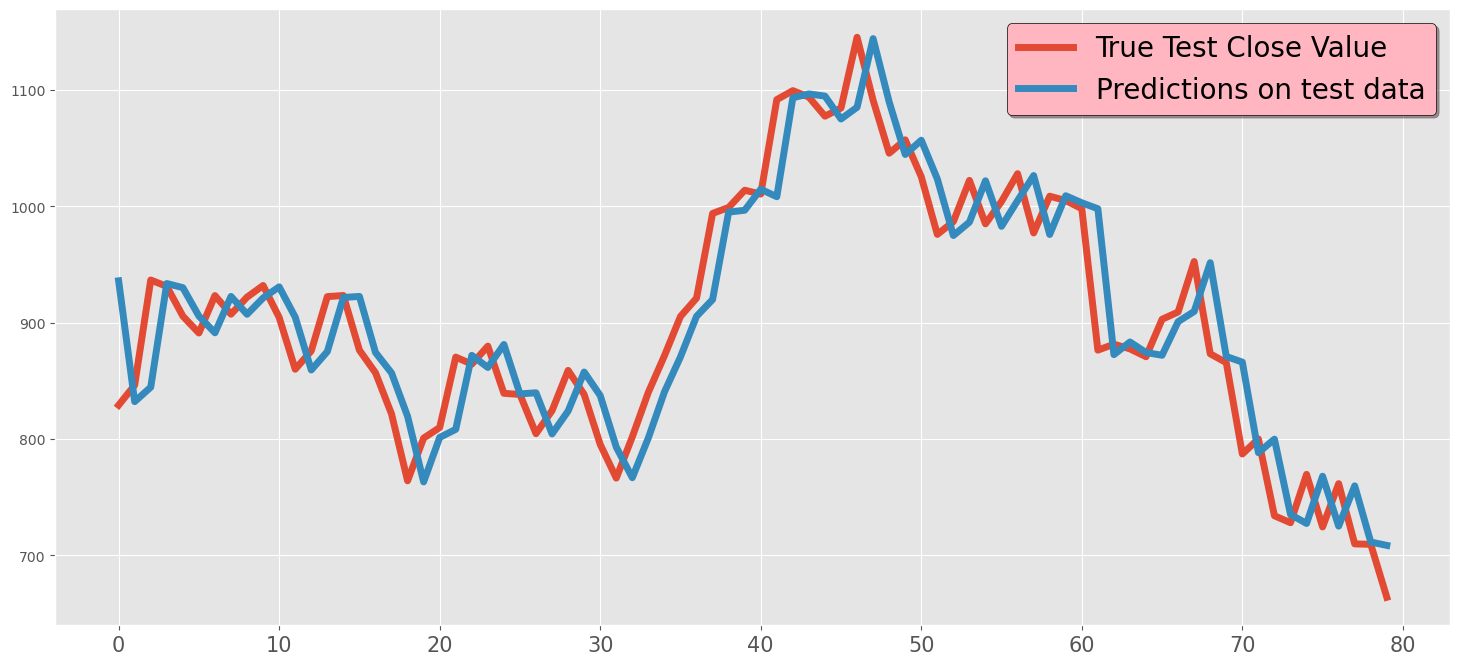

In [117]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [121]:
import statsmodels.api as sm
history=[x for x in train_data.Close]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=sm.tsa.statespace.SARIMAX(history,order=(2,0,1),seasonal_order=(1,1,1,3))
    model_fit=model.fit()
    fc=model_fit.forecast(alpha=0.05)
    predictions.append(fc)
     
    history.append(test_data.Close[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 40.613002056843854


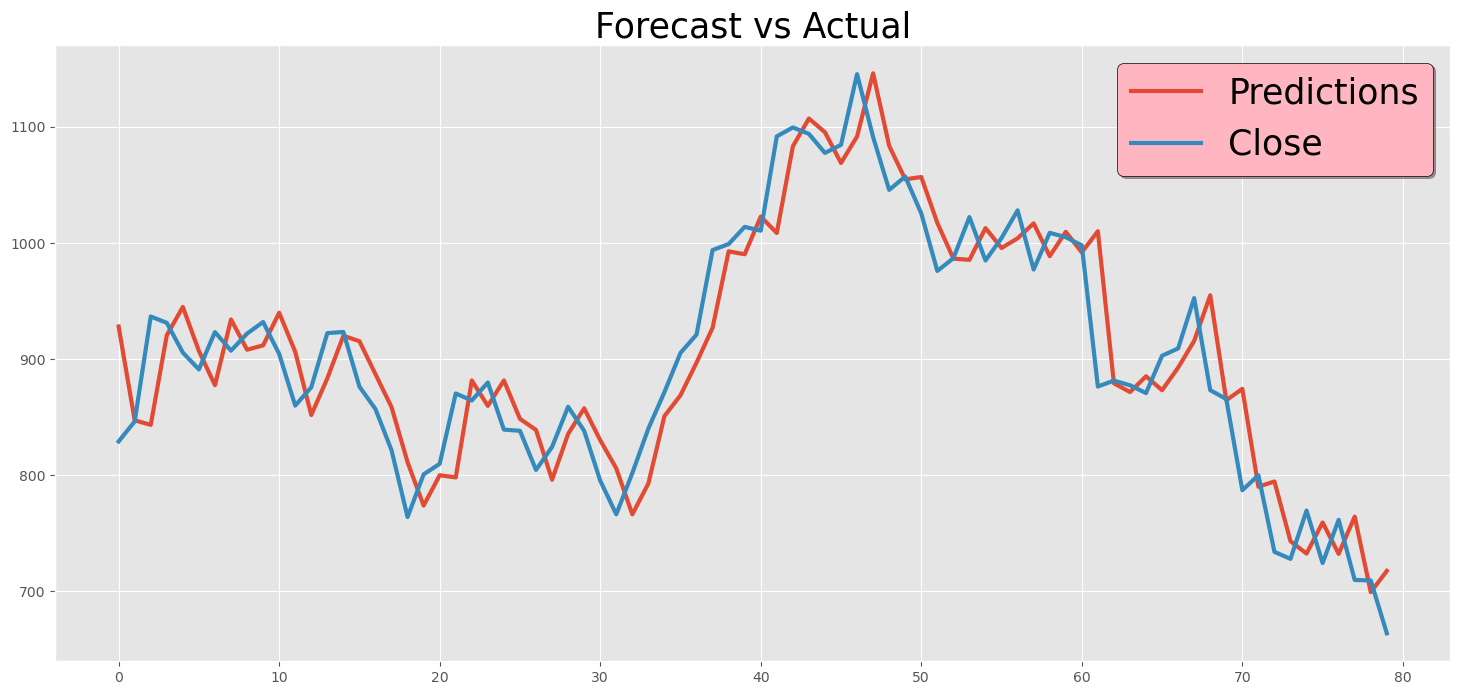

In [122]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(80), predictions, label = 'Predictions', linewidth = 3)
plt.plot(range(80), test_data, label = 'Close', linewidth = 3)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')